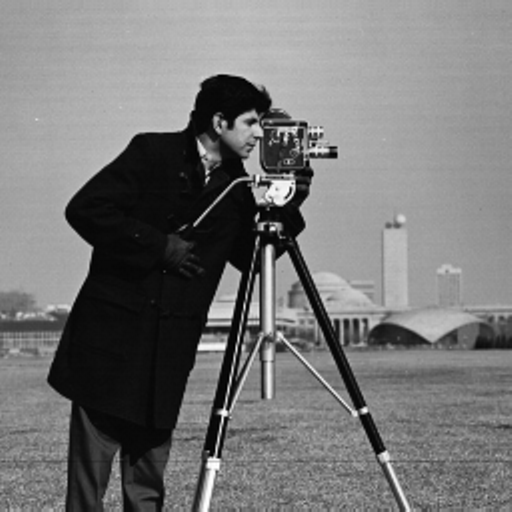

In [12]:
using TestImages, Colors, ImageShow, LinearAlgebra, Images, Plots

img1 = UInt8.(copy(rawview(channelview(load("lowContrastImage.png")))))[1,:,:]
img2 = UInt8.(testimage("cameraman")*255)
img3 = UInt8.(copy(rawview(channelview(load("fogg.jpeg")))))

img = img2

function ShowImage(A)
    mi = minimum(A)
    ma = maximum(A)
    return Gray.((A.-mi)/(ma-mi))
end

ShowImage(img)

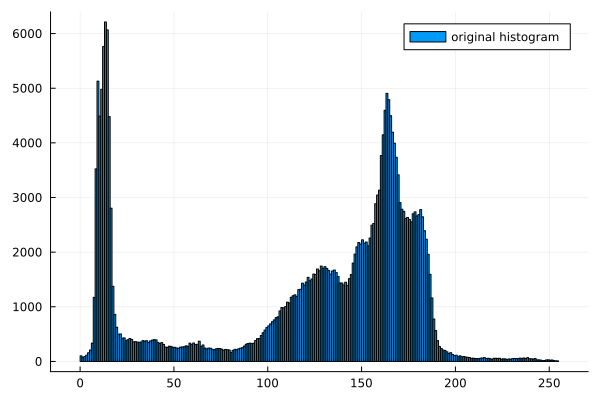

In [13]:
using Plots:histogram
H = histogram(img[:],bins = range(0, 255, length=256),label="original histogram")

In [14]:
# savefig("histOriginal.pdf")

In [15]:
# using StatsBase
function myContrastEnhancer(img)
    m,n = size(img)
    N = m*n
    
    counts = [count(==(k), img[:]) for k in 0:255]

    r = findall(!iszero,counts)
    q = length(r)
    h = counts[r]
    H = h/N
    
    A = zeros(m,n)
    
    for k in 1:q
        ind = findall(img.==r[k]-1)
        A[ind] .= sum(H[l] for l in 1:k)
    end
    return A
end

myContrastEnhancer (generic function with 1 method)

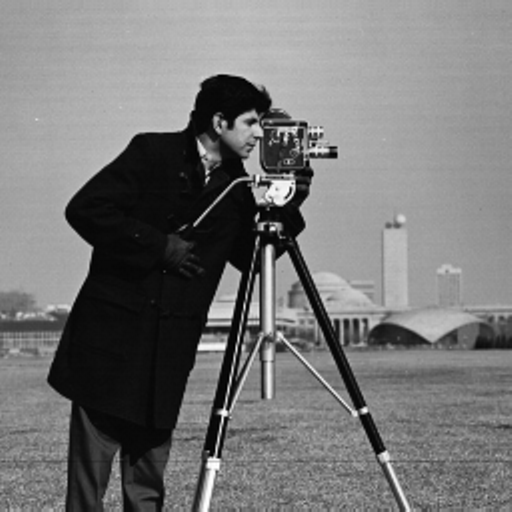

In [16]:
ShowImage(img)

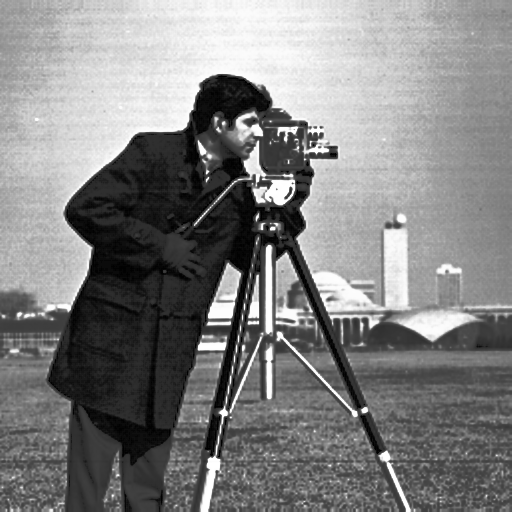

In [17]:
C = myContrastEnhancer(img)
CC = UInt8.(round.(C*255))
ShowImage(CC)

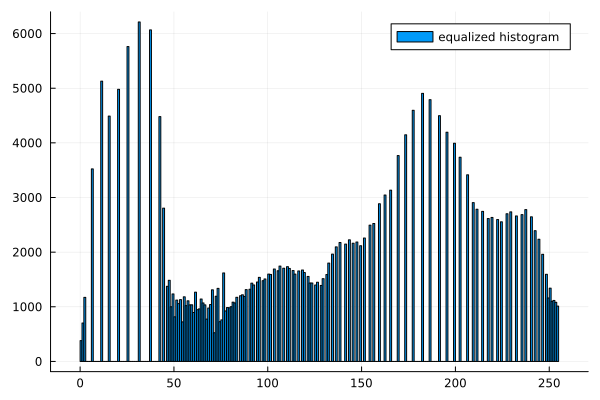

In [18]:
using Plots:histogram
CC = UInt8.(round.(C*255))
histogram(CC[:],bins = range(0, 255, length=256),label="equalized histogram")